<h1>EDA<h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Надо совсместить спаршенные данные и исходные

Какие признаки я взяла из исходного датасета: Название, Жанр, Платформа, Счет (оценка), Месяц и Год выпуска.
Брала их по двум причинам:
- В исходном датасете есть колонки: url, score_phrase и editors_choice,
которые, как мне кажется, никак не обогащают датасет
- Я не смогла понять, как и откуда с сайта IGN напарсить editors_choice, поэтому я просто не могу его добавить.

Я предпочла удалять строки с любым количеством пропусков, по двум причинам:
- Если данные отсутствуют - это не обзор компьютерной игры, а фильма,
  статьи или настольной игры (следовательно все такие варианты я сразу отсеила в рамках "Фильтрации данных")
- В моем датасете ставить в пропуски средние значение - некорректно. Как можно поставить среднее из игровых платформ?
  Или среднюю оценку игр? Цель моего исследования найти возможную взаимосвязь
  между датой выхода, жанром, оценкой и платформой. Делать эти значения рандомными = "средними"
  означает испортить выборку

In [3]:
with open("../All_data_files/total_data_set.csv", "w", encoding="utf-8") as total:
    with open("../All_data_files/try_more_data.csv", "r", encoding="utf-8") as ign:
        df1 = pd.read_csv(ign)
        df1 = df1.drop(np.where(df1['release_year'] == 2049)[0])
        # убираем все строки, где год выпуска 2049.
        # Это очевидный выброс, и он портит выборку
        df1 = df1.drop_duplicates(keep=False, inplace=False)
        df1.to_csv(total, encoding='utf-8', index=False)

    with open("../All_data_files/ign.csv", "r", encoding="utf-8") as ign:
        df2 = pd.read_csv(ign)
        df2.drop(df2.columns[[0]], axis=1, inplace=True)
        df2.drop(['score_phrase', 'url', 'editors_choice', 'release_day'], axis=1, inplace=True)
        df2 = df2.drop_duplicates(keep=False, inplace=False) # это я пытаюсь убрать дубликаты
        df2 = df2.dropna() # убираем нулевые строки (только тут, так как в моём датасете таких не нашлось)
        df2.to_csv(total, encoding='utf-8', index=False)

Далее просто проверяю, что файл открывается и читается без пропука строк.
Когда я убежусь, что всё работает, приступлю к следующим шагам

In [7]:
with open("../All_data_files/total_data_set.csv", "r", encoding="utf-8") as total:
    t = pd.read_csv(total)
    print(sorted(t["release_year"].unique()))
    # отсюда выясняю, что моё исследование будет охватывать игры в период с 1994 по 2024 (год 1970 и 2049 учитываться
    # не будут. Очевидно это выбросы
    # далее я убрала все пропуски и повторения. Таким образом удалось убрать оставшиеся "проскочившие" фильмы и комиксы
    print(t.isna().sum())
    print(t.info())

['1970', '1994', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'release_year']
title            0
platform         0
score            0
genre            0
release_year     0
release_month    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          21416 non-null  object
 1   platform       21416 non-null  object
 2   score          21416 non-null  object
 3   genre          21416 non-null  object
 4   release_year   21416 non-null  object
 5   release_month  21416 non-null  object
dtypes: object(6)
memory usage: 1004.0+ KB
None


Итого в моём датасете будет 21415 строк. Исходный датасет был обогащен на 6635 строк
Ссылок получилось меньше (около 5к), так как у некоторых игр по несколько жанров - а значит и строк

In [10]:
df = pd.read_csv('../All_data_files/total_data_set.csv')
print(df)

                                         title          platform score  \
0                               Stardew Valley     PlayStation 4  10.0   
1                               Stardew Valley          Xbox One  10.0   
2                               Stardew Valley  PlayStation Vita  10.0   
3                               Stardew Valley              iPad  10.0   
4                               Stardew Valley              iPod  10.0   
...                                        ...               ...   ...   
21411                Tokyo Mirage Sessions #FE             Wii U   7.6   
21412        LEGO Star Wars: The Force Awakens     PlayStation 4   9.0   
21413  Star Ocean: Integrity and Faithlessness     PlayStation 4   5.8   
21414                                   Inside          Xbox One  10.0   
21415                                   Inside                PC  10.0   

                   genre release_year release_month  
0                 iPhone         2023             6  
1  

Моя объясняемая переменная - это score, итоговый балл, который получила игра.

Объясняющие переменные - все остальные. Среди них:
1) Категориальные: platform, genre, release_year, release_month
2) Непрерывные: score (из новых: Game_genre_rate,Prop_of_genre_on_platf,Mean_score_per_genre)
Для категориальных переменный я не делала бинаризацию признаков, потому что в каждой переменной у меня
слишком много значений, будет странно разбивать один признак на 59 столбцов...

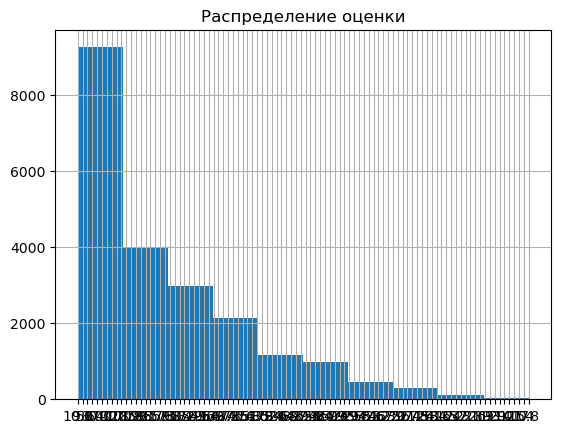

In [14]:
# Посмотрим, есть ли выбросы
fig = df['score'].hist()
plt.title("Распределение оценки")
plt.show()

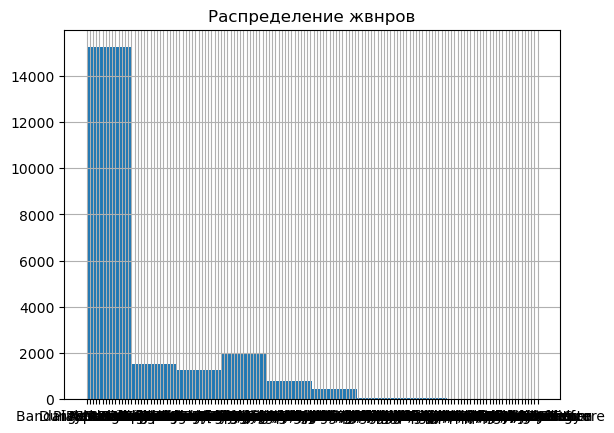

In [15]:
fig = df['genre'].hist()
plt.title("Распределение жвнров")
plt.show()

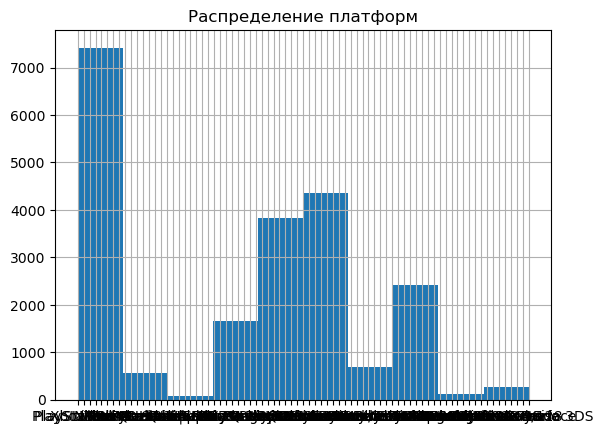

In [16]:
fig = df['platform'].hist()
plt.title("Распределение платформ")
plt.show()

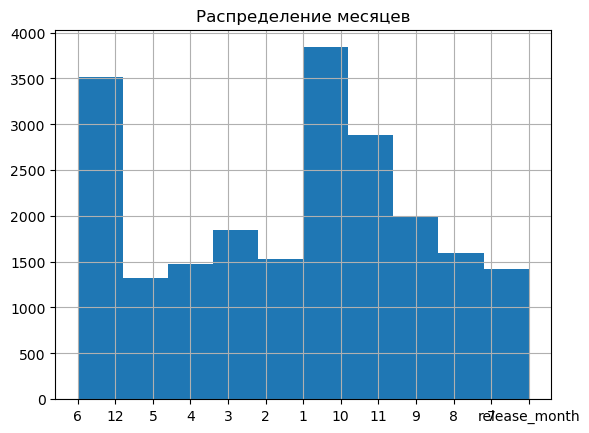

In [17]:
fig = df['release_month'].hist()
plt.title("Распределение месяцев")
plt.show()

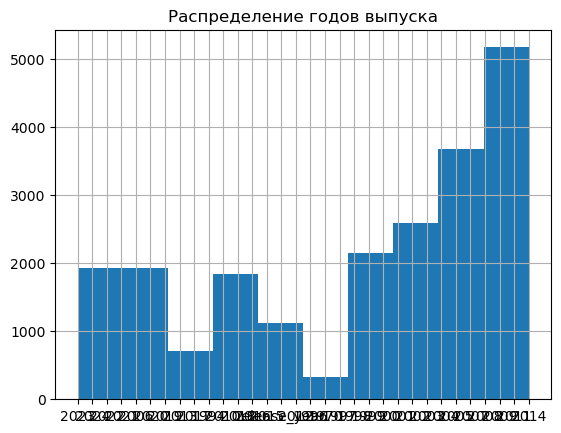

In [18]:
fig = df['release_year'].hist()
plt.title("Распределение годов выпуска")
plt.show()

In [21]:
# Уберу выброс с 1970 годом
indx = df[df['release_year'] == 1970].index
df.drop(indx, inplace=True)
df.to_csv('total_data_set.csv', index=False, encoding='utf-8')

В ручном режиме убираю лишнюю строку с заголовками второго датасета
Для начала посмотрим распределение оценки игры и ее жанра, платформы, месяца выпуска

Итак, мне не понравилась мультижаноровость, которую я забыла убрать на предыдущих шагах.
Поэтому буду убирать ее здесь. Я решила, что я прочешу файл, соберу все жанры, везде, где их два, сделаю один.
После этого запихну всё в список, и сделаю новых стобец в датафрейме single_genre_table. После этого добавлю
этот столбец в мой исходный датафрем вместо столбца genre.
Я боюсь, что таким образом я очень нагружу комп, потому что хранить список из 25к значений звучит ужасно.
Но я не придумала, как сделать лучше, буду признательна, если дадите коментарии по этому моменту.

In [22]:
with open("../All_data_files/total_data_set.csv", 'r+', encoding='utf-8') as file:
    df = pd.read_csv(file, engine='python')
    print(df['genre'])
    single_genre_table = pd.DataFrame()
    safe_list = []
    for i in df['genre']:
        safe_list.append(i.split(",")[0])
    single_genre_table['single_genre'] = safe_list
    df['genre'] = single_genre_table['single_genre']
    df.to_csv('total_data_set.csv', index=False, encoding='utf-8')

0                   iPhone
1                   iPhone
2                   iPhone
3                   iPhone
4                   iPhone
               ...        
21411                  RPG
21412    Action, Adventure
21413                  RPG
21414            Adventure
21415            Adventure
Name: genre, Length: 21416, dtype: object


Я убрала мультижанровость, стало лучше, теперь мои графики выглядят не совсем как каша. Но... вам может показаться, что
некоторые жанры игр нелепые, типа Number of players. Мне тоже так кажется, но я посмотрела, и такой реально есть,
вот тут игры этого жанра: https://www.ign.com/games/feature/number-of-players.
Поэтому, если какой-то жанр кажется не уместным, или не жанром вообще, то все вопросы не ко мне, а к IGN, которые
выделили такие жанры...

In [31]:
ser = pd.Series(df['score'])
ser = ser.replace('score', '')
ser = pd.to_numeric(ser)

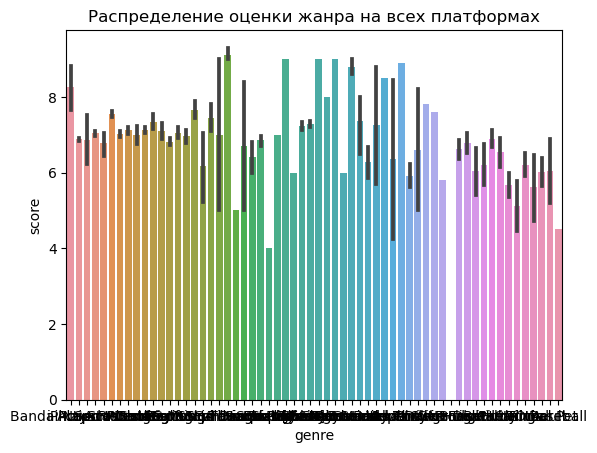

In [32]:
fig1 = sns.barplot(data=df, x='genre', y=ser)
plt.title("Распределение оценки жанра на всех платформах")
plt.show()

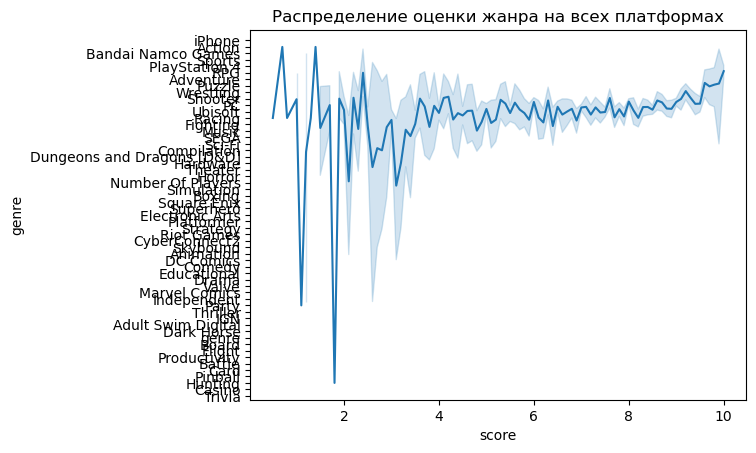

In [34]:
fig2 = sns.lineplot(data=df, y="genre", x=ser)
plt.title("Распределение оценки жанра на всех платформах")
plt.show()

Если я правильно прочитала график, кажется, что оценки выше у многопользовательских игр (обычно жанры Экшн, Спортивные, Шутеры и тд жанры для нескольких игроков).

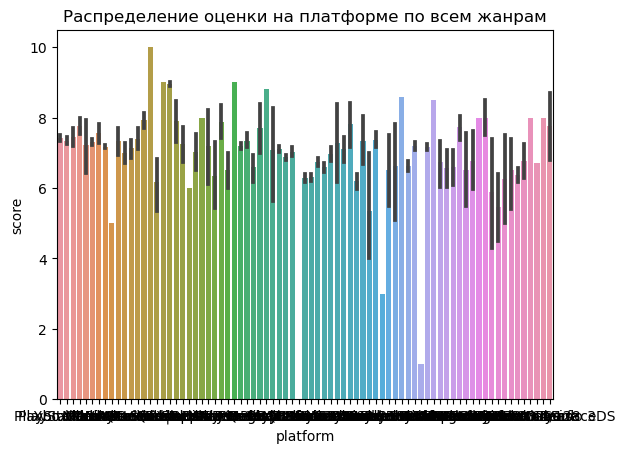

In [35]:
fig3 = sns.barplot(data=df, x='platform', y=ser)
plt.title("Распределение оценки на платформе по всем жанрам")
plt.show()

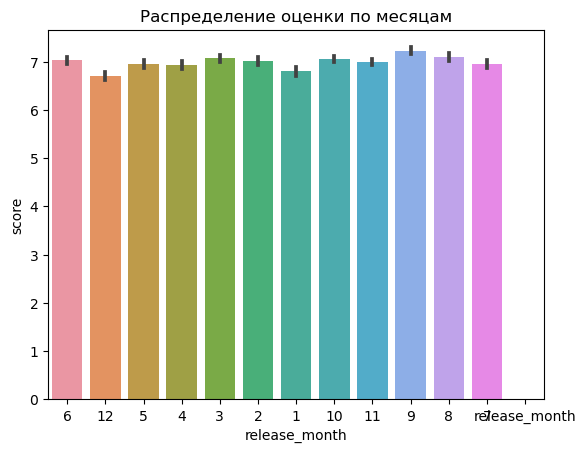

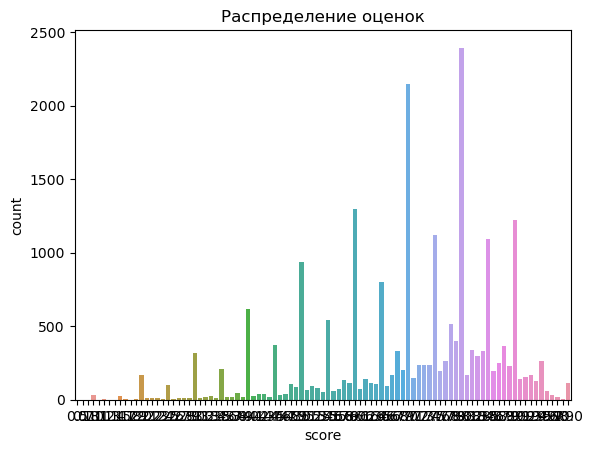

In [36]:
fig4 = sns.barplot(data=df, x='release_month', y=ser)
plt.title("Распределение оценки по месяцам")
plt.show()
#
fig5 = sns.countplot(ser)
plt.title("Распределение оценок")
plt.show()

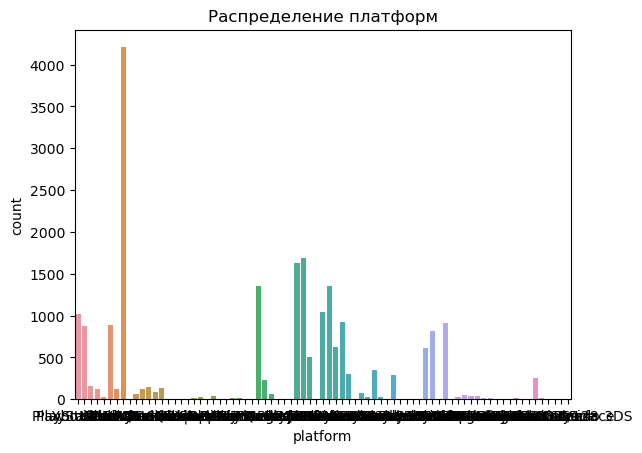

In [37]:
fig6 = sns.countplot(df['platform'])
plt.title("Распределение платформ")
plt.show()

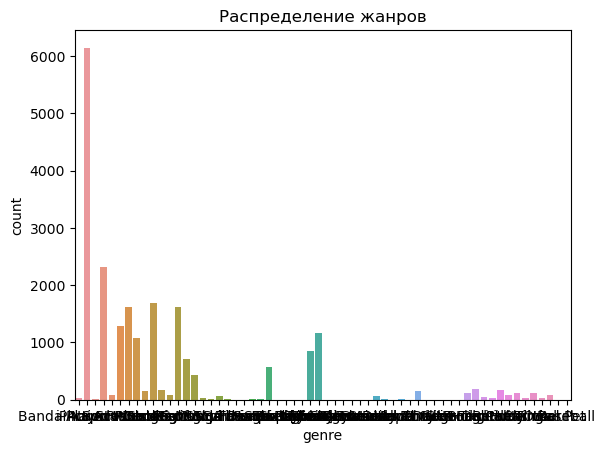

In [38]:
fig7 = sns.countplot(df['genre'])
plt.title("Распределение жанров")
plt.show()

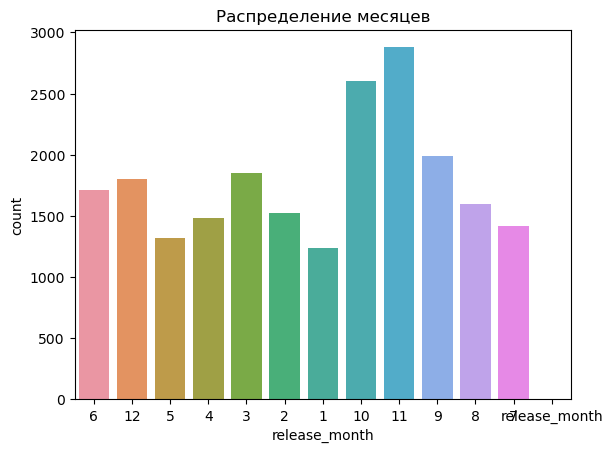

In [39]:
fig8 = sns.countplot(df['release_month'])
plt.title("Распределение месяцев")
plt.show()

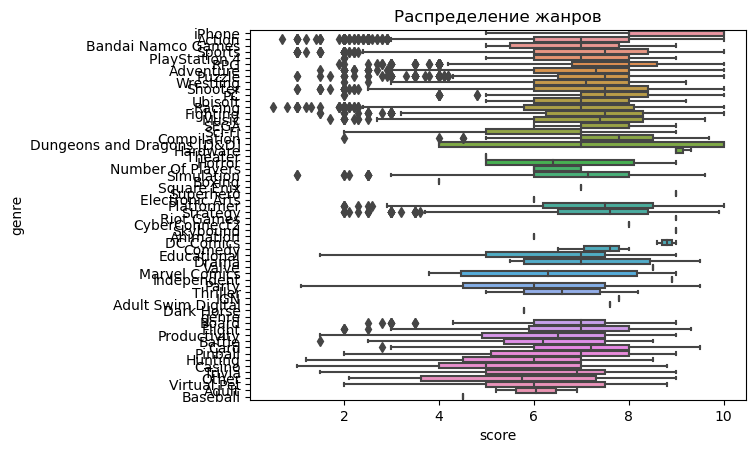

In [41]:
fig9 = sns.boxplot(data=df, y=df['genre'], x=ser)
plt.title("Распределение жанров")
plt.show()

вот этот график для меня самый важный пока что. Он структурирует все точки и показывает,
где они концентрируются, то есть как раз примерно средняя оценка жанра. Экшн это и
самый многочисленный жанр, и один и самых высокооцениваемых

выглядит прикольно, как будто в последние годы стало меньше плохих оценок. Люди стали лояльнее?


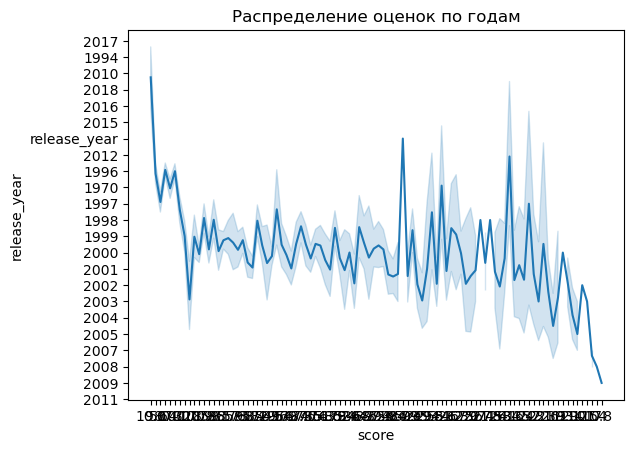

In [42]:
fig10 = sns.lineplot(data=df, y="release_year", x="score")
plt.title("Распределение оценок по годам")
plt.show()

Text(0.5, 1.0, 'Распределение месяцев')

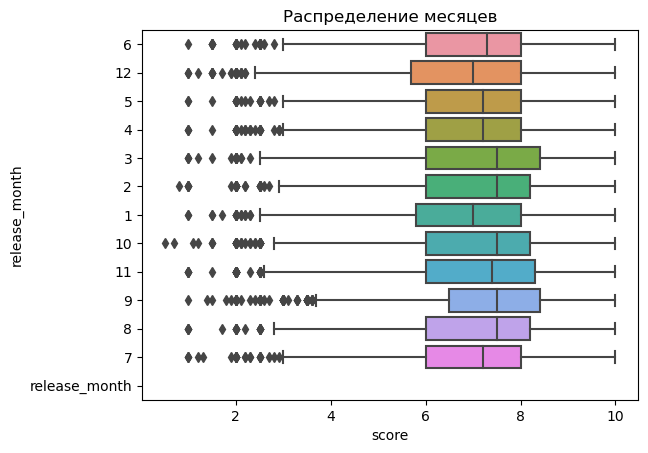

In [43]:
fig11 = sns.boxplot(data=df, y=df['release_month'], x=ser)
plt.title("Распределение месяцев")

Наиболее высокие оценки идут с 5 по 10 месяцы. Это с мая по октябрь. Лучшее время для выпуска игр)))

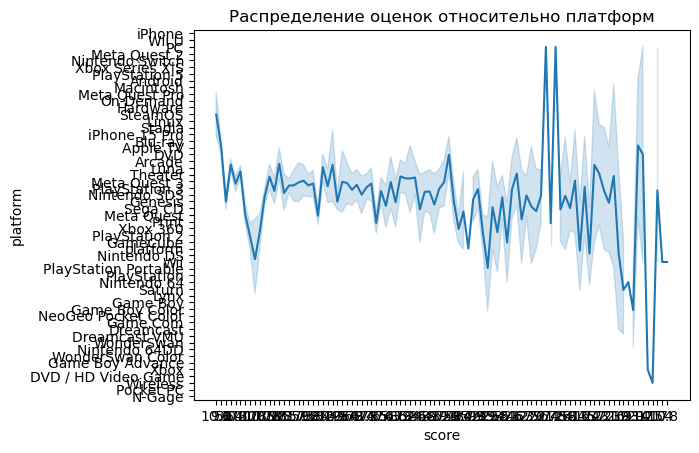

In [45]:
fig12 = sns.lineplot(data=df, y="platform", x="score")
plt.title("Распределение оценок относительно платформ")
plt.show()

На платформах с Meta Quest Pro до Nintendo 64 DD были замечены оценки от 10 до 7 - то есть самые предпочтительные.
Возможно самые лучшие платформы для релиза)

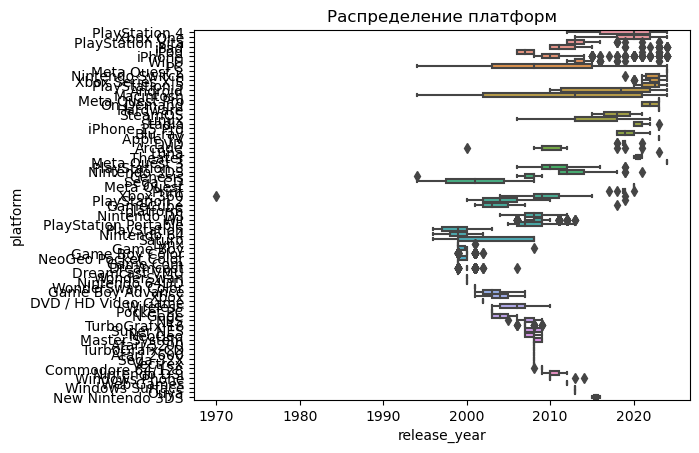

In [46]:
ser1 = pd.Series(df['release_year'])
ser1 = ser1.replace('release_year', '')
ser1 = pd.to_numeric(ser1)
fig13 = sns.boxplot(data=df, y=df['platform'], x=ser1)
plt.title("Распределение платформ")
plt.show()

Вот тут прикольно, что игры, на платформах которых были наибольшие оценки - это всё более старые игры до 2015

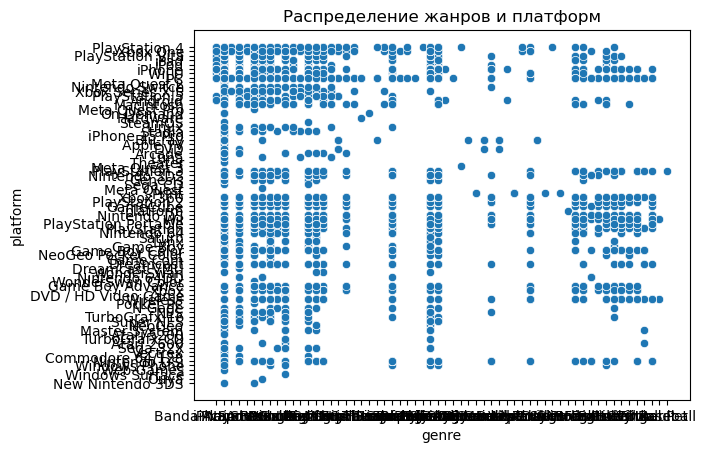

In [47]:
fig14 = sns.scatterplot(data=df, x="genre", y="platform")
plt.title("Распределение жанров и платформ")
plt.show()

In [53]:
pd.set_option('display.max_columns', 20) # чтобы в пайчарем показывались все стобцы без ...
pd.set_option('display.width', 2000) # чтобы в пайчарме всё было на одном экране
print(df.describe())

                 title platform  score   genre release_year release_month
count            21416    21416  21416   21416        21416         21416
unique           13537       77     94      60           32            13
top     Stardew Valley       PC    8.0  Action         2008            11
freq                16     4207   2393    6143         1901          2877


In [54]:
print(df.mode())

            title platform score   genre release_year release_month
0  Stardew Valley       PC   8.0  Action         2008            11


In [83]:
df.drop(df.index[2922], inplace=True)

In [123]:
from pandas.api.types import is_numeric_dtype

False

In [132]:
pd.to_numeric(df['score'])
pd.to_numeric(df['release_year'])
pd.to_numeric(df['release_month'])

# df.drop('title', axis=1, inplace=True)
# df.drop('platform', axis=1, inplace=True)
# df.drop('genre', axis=1, inplace=True)
# не особо оценка игры коррелирует с другими моими показателями конечно...
print(pd.to_numeric(df['score']).corr(pd.to_numeric(df['release_month'])))
print(pd.to_numeric(df['score']).corr(pd.to_numeric(df['release_year'])))
print(pd.to_numeric(df['release_year']).corr(pd.to_numeric(df['release_month'])))

0.001515535204177676
0.08695418567934012
-0.07786730800629087


~Я терпеть не могу Jupiter. В Pycharm всё прекрсано работает, а здесь корреляционная матрица отказалась строиться, 
потому что не царское это дело~

Вывод по целевой переменной score: в среднем по всем играм на всех платформах ставится оценка 6-8
(тк среднее ~6.99, медиана 7.3, а стд 1,68 (дисперсия 2.8)). А учитывая то,
что 25% квантиль составил 6, это значит, что менее 25% всех оценок это оценки ниже 6.
Думаю, из этого можно сделать вывод, что в целом портал IGN достаточно лояльное оценивает игры
(больше всего оценок 8, тк. мода = 8) , и надо очень сильно постараться, чтобы получить у них плохую оценку.
Все оценки расположены в диапазоне от 0.5 до 10.